In [44]:
import numpy as np
import pandas as pd

# get the features from the file 'features.txt' located in 'UCI_HAR_DATA' file 
features = list()
with open('UCI_HAR_DATA/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


##Get Training Data

In [45]:
# get the data from txt files to pandas dataffame

X_train = pd.read_csv('UCI_HAR_DATA/train/X_train.txt', delim_whitespace=True, header=None) 
X_train.columns = features
X_train['subject'] = pd.read_csv('UCI_HAR_DATA/train/subject_train.txt', header=None, squeeze=True)


y_train = pd.read_csv('UCI_HAR_DATA/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
51,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,...,-0.06858,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876,1,6,LAYING


In [46]:
train.shape

(7352, 564)

## Get Test Data

In [47]:
# extract data from txt files into pandas dataframe
X_test = pd.read_csv('UCI_HAR_DATA/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_DATA/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_DATA/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1063,0.284093,-0.025643,-0.124543,-0.989999,-0.934129,-0.975798,-0.991623,-0.92971,-0.973788,-0.926469,...,-0.010237,0.411362,-0.636912,-0.564897,-0.825883,-0.008751,-0.046651,10,5,STANDING


In [48]:
test.shape

(2947, 564)

## Checking for duplicates in both sets

In [49]:
print('duplicates in training set: {}'.format(sum(train.duplicated())))
print('duplicates in test set : {}'.format(sum(test.duplicated())))

duplicates in training set: 0
duplicates in test set : 0


## Checking for Extraneous Values

In [50]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## Plotting Each User's Data to get an overall visualization and to make sure we don't have any data imbalances

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

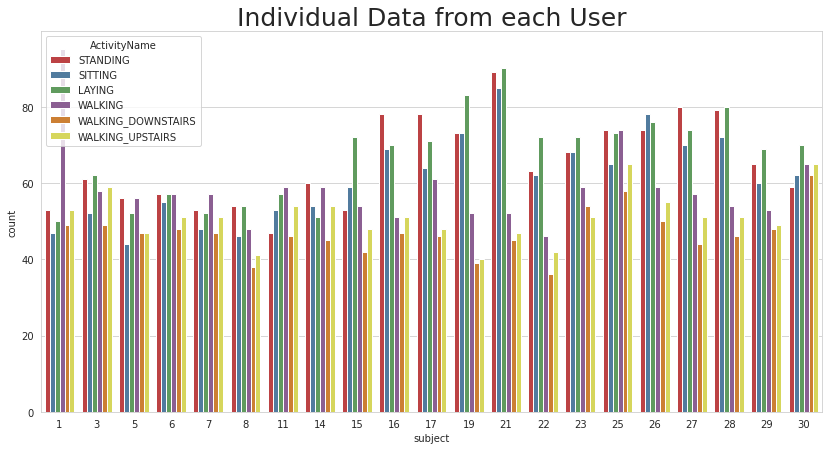

In [83]:
plt.figure(figsize=(14,7))
plt.title('Individual Data from each User', fontsize=25)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


## Plotting the number of data points per activity in general to see if we have roughly the same amount in each activity to get best chance of accuracy in our ML models

/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


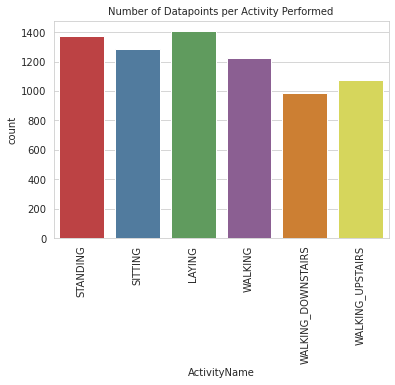

In [84]:
plt.title('Number of Datapoints per Activity Performed', fontsize=10)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

## Changing feature names and and saving it to csv's 

In [122]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

train.to_csv('UCI_HAR_DATA/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_DATA/csv_files/test.csv', index=False)

/var/folders/ts/psjvcxrd5x5bbd93tl7z65f00000gn/T/ipykernel_55366/2493081867.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
/var/folders/ts/psjvcxrd5x5bbd93tl7z65f00000gn/T/ipykernel_55366/2493081867.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
/var/folders/ts/psjvcxrd5x5bbd93tl7z65f00000gn/T/ipykernel_55366/2493081867.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


## Analysis of Stationary vs Moving Activities

/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/parkerbath/opt/anaconda

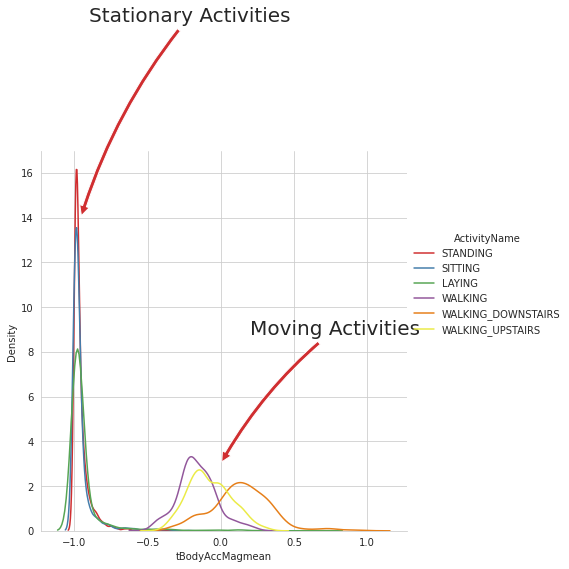

In [103]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=1)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

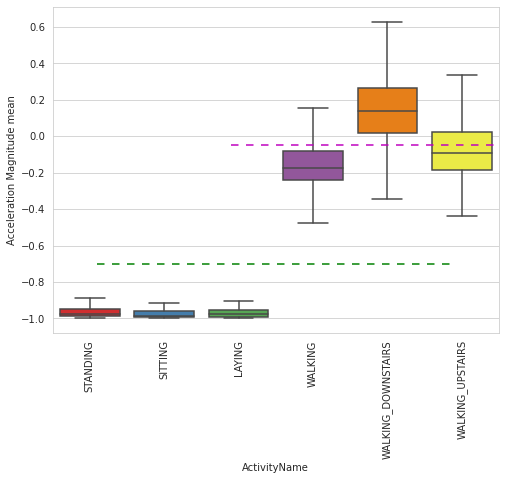

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

## Checking the magnitude of the acceleration can help better separate the data visually

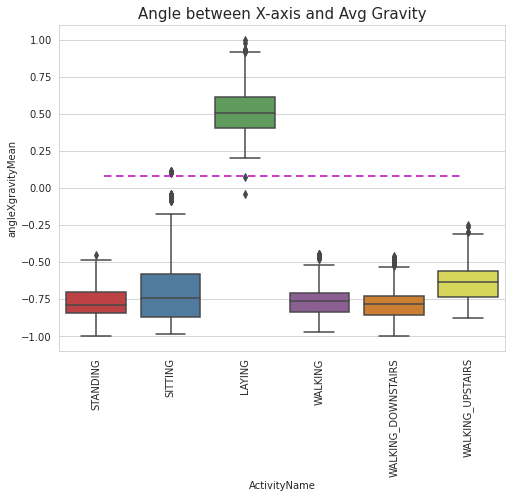

In [123]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Avg Gravity', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

## Visualizing the Gravity's acceleration position

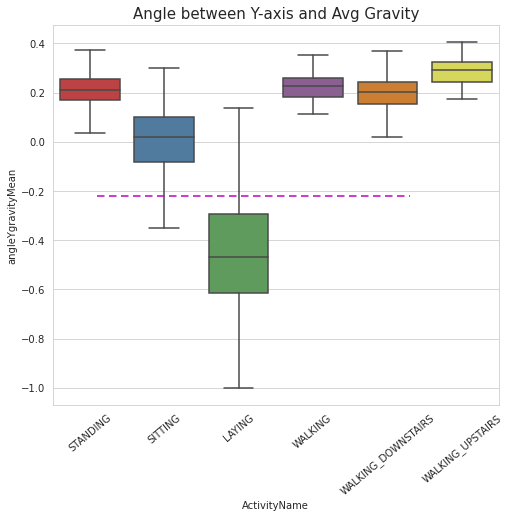

In [117]:
plt.figure(figsize=(8,7))
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Avg Gravity', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()